## Global mean temperature

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

Global temperature and precipitation data
https://catalogue.ceda.ac.uk
Please feel free to use the low resolution data.

In [3]:
filename='/Users/jungeunl/Cycad/class/data/cru_ts4.03.1901.2018.tmp.dat.nc' #using Python on my laptop

In [4]:
with xr.open_dataset(filename) as ds:
    print(ds)
    temp=ds.tmp

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 1416)
Coordinates:
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2018-12-16
Data variables:
    tmp      (time, lat, lon) float32 ...
    stn      (time, lat, lon) float64 ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.03 Mean Temperature
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 1905011326. Data generated from:tmp.1905011321.dtb
    history:      Wed  1 May 2019 15:42:51 BST : User ianharris : Program mak...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk


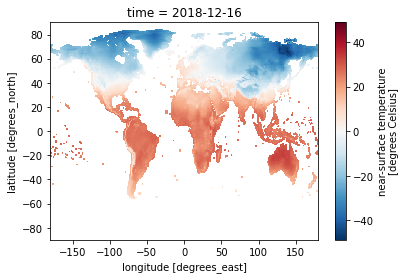

In [5]:
temp.isel(time=-1).plot()

## Creating weights

For a rectangular grid the cosine of the latitude is proportional to the grid cell area.

In [6]:
weights = np.cos(np.deg2rad(temp.lat))
weights.name = "weights"

In [7]:
# Weighted mean
temp_w = temp.weighted(weights)

temp_avg = temp_w.mean(("lon", "lat"))
temp_avg

<xarray.DataArray (time: 1416)>
array([ 4.9566174,  6.425854 ,  9.627878 , ..., 15.119727 , 10.286656 ,
        7.410867 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2018-12-16

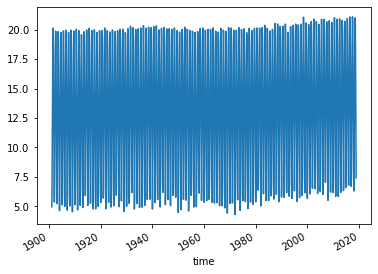

In [8]:
temp_avg.plot()

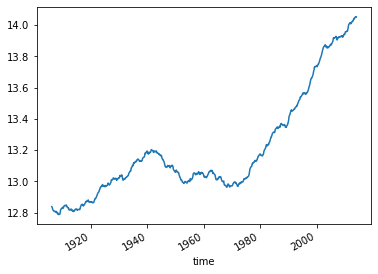

In [9]:
# 10 year running mean
t_roll_avg = temp_avg.rolling(time=120, center=True).mean() # 10 year running mean
t_roll_avg.plot()

### Exercise
Plot 5 year-running mean of temperature

### Exercise
Read precipitation data "cru_ts4.03.1901.2018.pre.dat.nc" and plot 10 year-running average of global of precipitation. You can use the low-resolution data